# Automobile Customer

## Context

Customer segmentation is the practice of dividing a customer base into groups of individuals that are similar in specific ways relevant to marketing, such as age, gender, interests and spending habits.

Companies employing customer segmentation operate under the fact that every customer is different and that their marketing efforts would be better served if they target specific, smaller groups with messages that those consumers would find relevant and lead them to buy something. Companies also hope to gain a deeper understanding of their customers' preferences and needs with the idea of discovering what each segment finds most valuable to more accurately tailor marketing materials toward that segment.

## Content

An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market.

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for different segment of customers. This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers.

The dataset provides the details of the existing and potential customers of the company based on the purchase history and the corresponding segments they have been classified into.

# Library

In [3]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Encoders
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder
from category_encoders import BinaryEncoder

# Imputer
from sklearn.impute import KNNImputer

# Transformer
from sklearn.compose import ColumnTransformer

# Scaler
from sklearn.preprocessing import MinMaxScaler

# Data Splitting
from sklearn.model_selection import train_test_split

# Clustering
from sklearn.cluster import KMeans

# Decomposition
from sklearn.decomposition import PCA

# Metrics
from sklearn.metrics import silhouette_score

# Missing Value
import missingno as msno

# Data

## Data at a glance

In [4]:
# Data Loading
df = pd.read_csv('datasets/train-set.csv')

# The Data
df.head()

,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Category 4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Category 4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Category 6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Category 6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Category 6,A


## Data Info

In [5]:
# Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      8068 non-null   int64  
 1   Gender          8068 non-null   object 
 2   Married         7928 non-null   object 
 3   Age             8068 non-null   int64  
 4   Graduated       7990 non-null   object 
 5   Profession      7944 non-null   object 
 6   WorkExperience  7239 non-null   float64
 7   SpendingScore   8068 non-null   object 
 8   FamilySize      7733 non-null   float64
 9   Category        7992 non-null   object 
 10  Segmentation    8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


## Summary Statistics

In [5]:
# Summary Statistics Numerical Values
df.describe()

,CustomerID,Age,WorkExperience,FamilySize
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [7]:
# Summary Statistics Categorical Values
df.describe(include='object')

,Gender,Married,Graduated,Profession,SpendingScore,Category,Segmentation
count,8068,7928,7990,7944,8068,7992,8068
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Category 6,D
freq,4417,4643,4968,2516,4878,5238,2268


## Duplicate Value

In [8]:
# Duplicates
df[df['CustomerID'].duplicated()]

,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category,Segmentation


## Missing Value

In [9]:
# Missing Value Each Features
df.isnull().sum()

CustomerID          0
Gender              0
Married           140
Age                 0
Graduated          78
Profession        124
WorkExperience    829
SpendingScore       0
FamilySize        335
Category           76
Segmentation        0
dtype: int64

In [10]:
# Percentage of Missing Values each Features
## Column Names
columns = ['Married', 'Graduated', 'Profession', 'WorkExperience', 'FamilySize', 'Category']

## Columns Dictionary
missing_val = pd.DataFrame({'Columns':columns})

## Count Missing Value Iteration
miss = []
for i in columns:
  miss.append(df.isnull().sum().loc[i])

## Adding Count Missing Value to The List
missing_val['Count'] = miss

## Percentage of Missng Value
missing_val['Percentage'] = missing_val['Count'].apply(lambda x: round((x/len(df) * 100),2))

## Sorting
missing_val_sort = missing_val.sort_values(by='Count', ascending=False)

## The Result
missing_val_sort

,Columns,Count,Percentage
3,WorkExperience,829,10.28
4,FamilySize,335,4.15
0,Married,140,1.74
2,Profession,124,1.54
1,Graduated,78,0.97
5,Category,76,0.94


# Exploratory Data Analysis

## Data Proportion

In [ ]:
def pie_count(labels):
    count = df.groupby(labels)['CustomerID'].count().reset_index()
    plt.pie(x='CustomerID',labels=labels, data=count, autopct='%.2f%%')

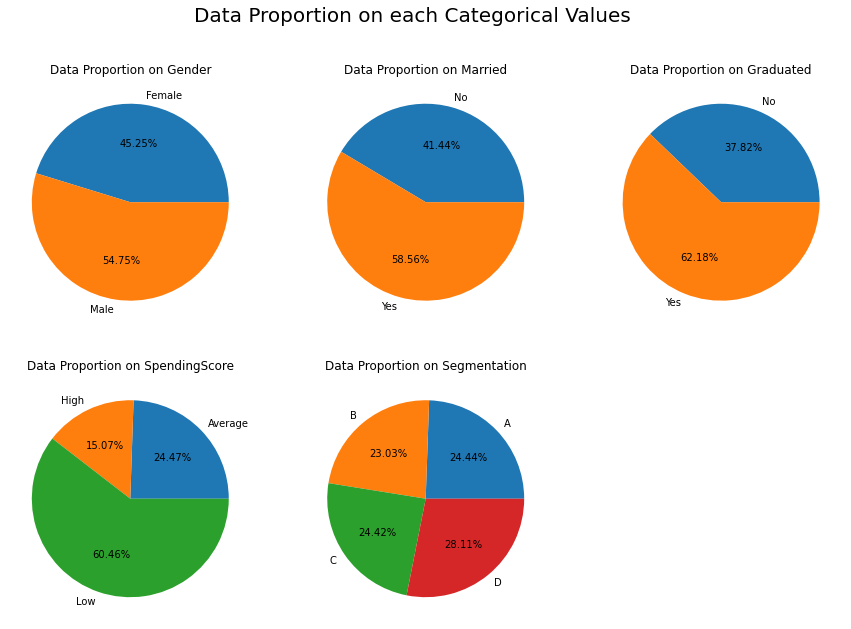

In [11]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
pie_count('Gender')
plt.title('Data Proportion on Gender')

plt.subplot(2,3,2)
pie_count('Married')
plt.title('Data Proportion on Married')

plt.subplot(2,3,3)
pie_count('Graduated')
plt.title('Data Proportion on Graduated')

plt.subplot(2,3,4)
pie_count('SpendingScore')
plt.title('Data Proportion on SpendingScore')

plt.subplot(2,3,5)
pie_count('Segmentation')
plt.title('Data Proportion on Segmentation')

plt.suptitle('Data Proportion on each Categorical Values', size=20)
plt.show()

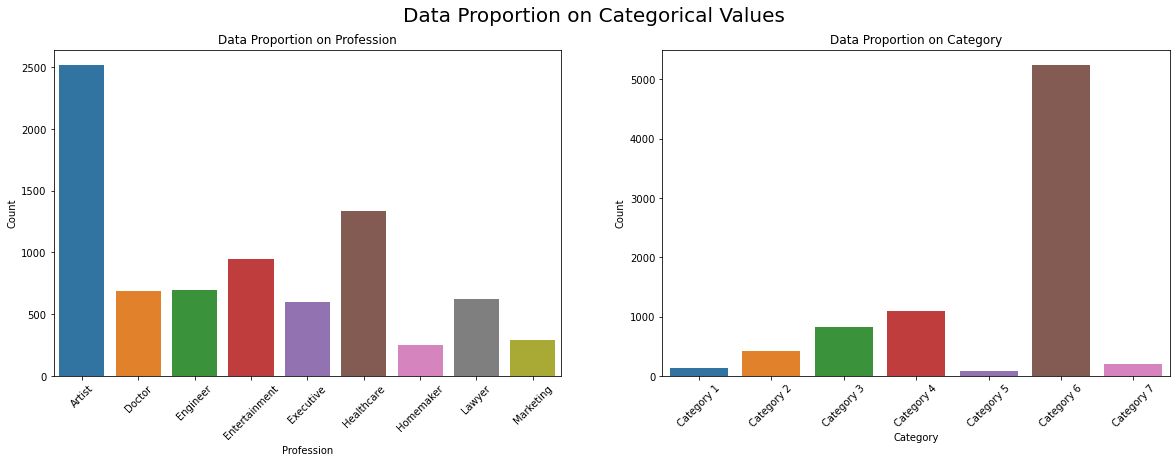

In [12]:
profession_count = df.groupby('Profession')['CustomerID'].count().reset_index().sort_values(by='Profession')
category_count = df.groupby('Category')['CustomerID'].count().reset_index().sort_values(by='Category')

plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.barplot(x='Profession', y='CustomerID', data=profession_count)
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Data Proportion on Profession')

plt.subplot(1,2,2)
sns.barplot(x='Category', y='CustomerID', data=category_count)
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Data Proportion on Category')

plt.suptitle('Data Proportion on Categorical Values', size=20)
plt.show()

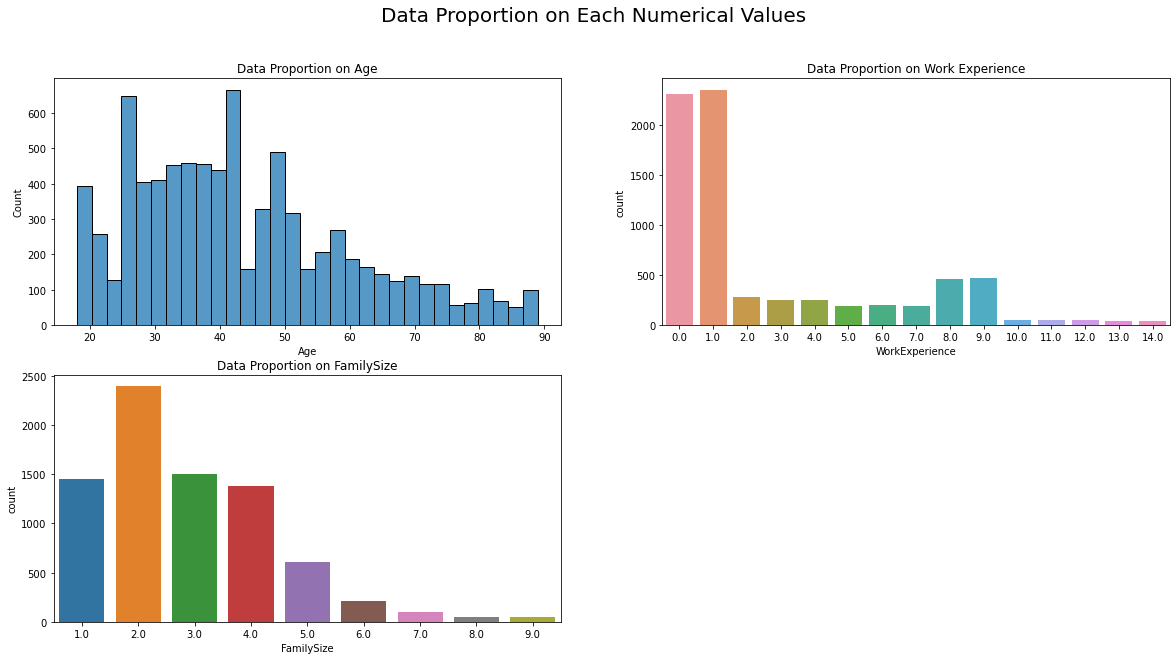

In [13]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.histplot(df['Age'])
plt.title('Data Proportion on Age')

plt.subplot(2,2,2)
sns.countplot(x='WorkExperience', data=df)
plt.title('Data Proportion on Work Experience')

plt.subplot(2,2,3)
sns.countplot(x='FamilySize', data=df)
plt.title('Data Proportion on FamilySize')

plt.suptitle('Data Proportion on Each Numerical Values', size=20)
plt.show()

## Age with All of The Features

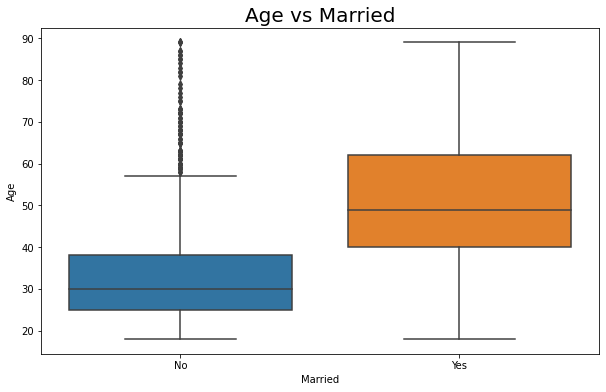

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Married', y='Age', data=df)
plt.title('Age vs Married', size=20)
plt.show()

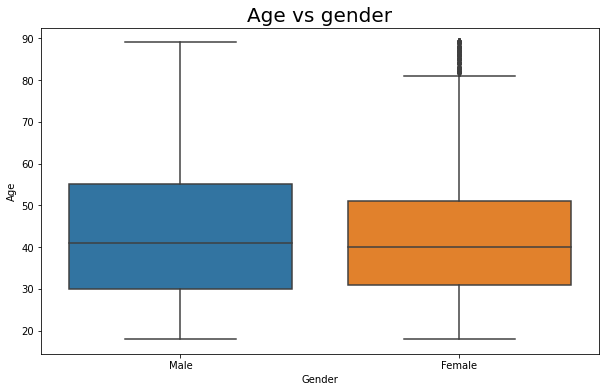

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Gender', y='Age', data=df)
plt.title('Age vs gender', size=20)
plt.show()

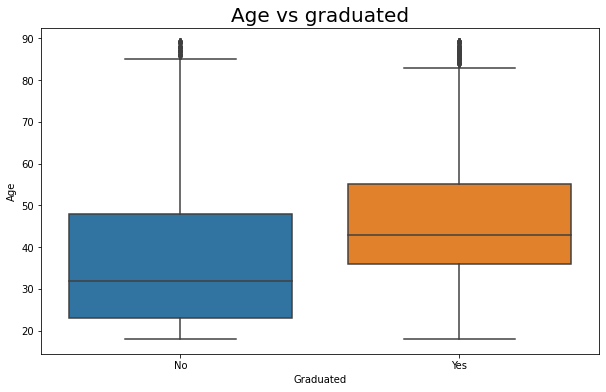

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Graduated', y='Age', data=df)
plt.title('Age vs graduated', size=20)
plt.show()

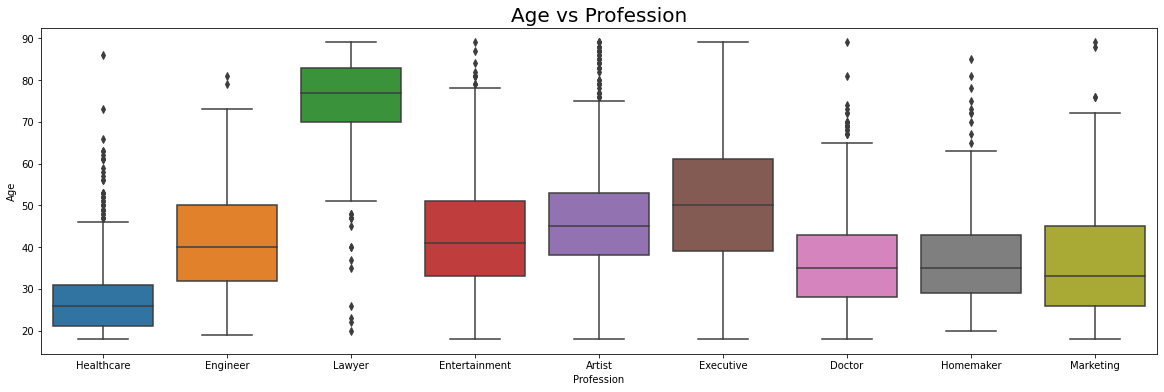

In [17]:
plt.figure(figsize=(20,6))
sns.boxplot(x='Profession', y='Age', data=df)
plt.title('Age vs Profession', size=20)
plt.show()

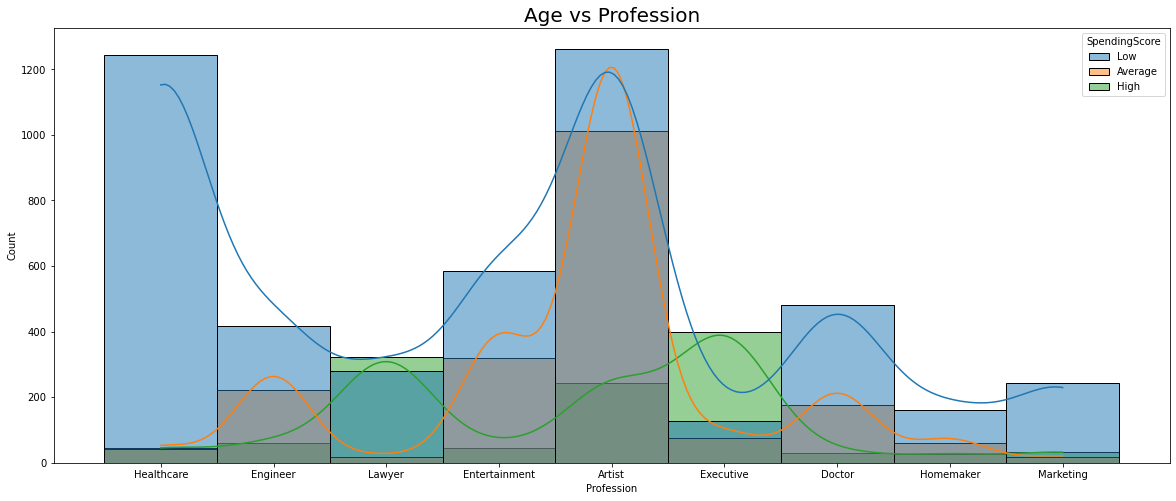

In [18]:
plt.figure(figsize=(20,8))
sns.histplot(x='Profession', data=df, hue='SpendingScore', kde=True)
plt.title('Age vs Profession', size=20)
plt.show()

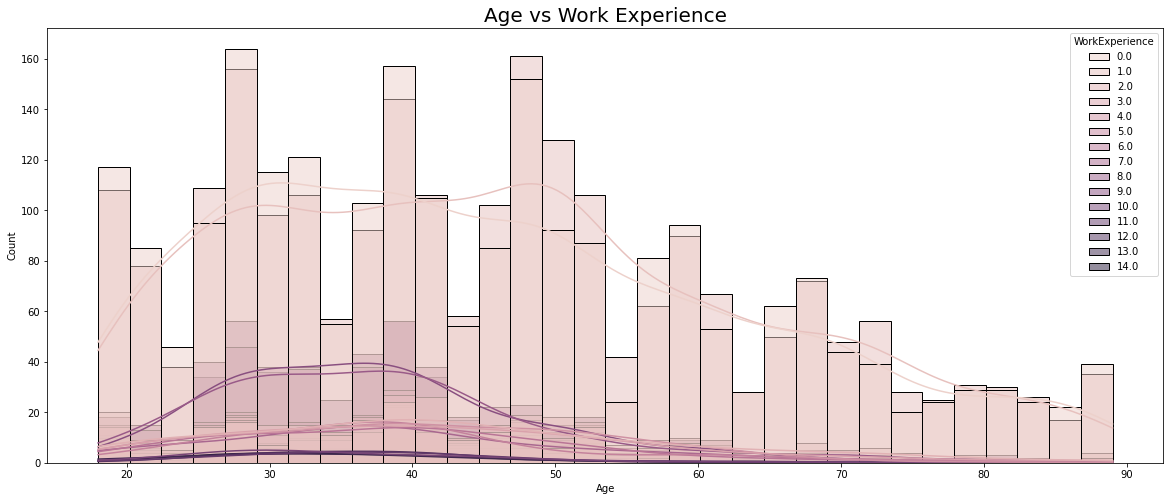

In [19]:
plt.figure(figsize=(20,8))
sns.histplot(hue='WorkExperience', x='Age', data=df, kde=True)
plt.title('Age vs Work Experience', size=20)
plt.show()

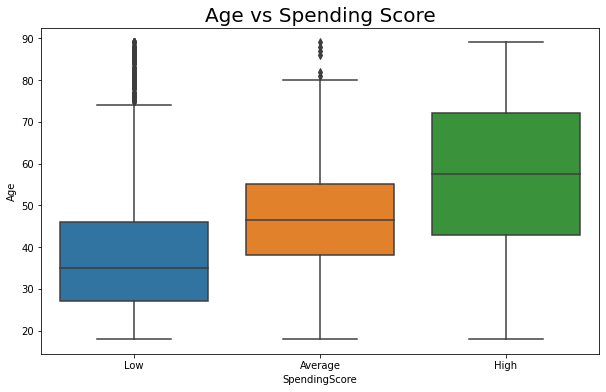

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x='SpendingScore', y='Age', data=df)
plt.title('Age vs Spending Score', size=20)
plt.show()

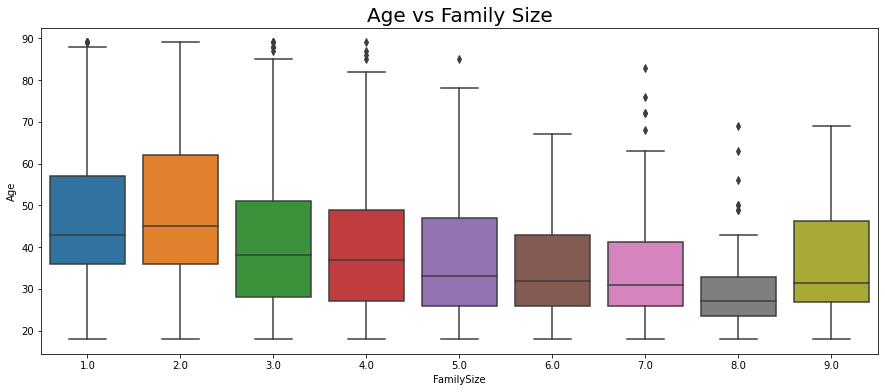

In [21]:
plt.figure(figsize=(15,6))
sns.boxplot(x='FamilySize', y='Age', data=df)
plt.title('Age vs Family Size', size=20)
plt.show()

# Preprocessing

## Missing Value

In [22]:
# Dropping Columns
df.dropna(subset=['Married', 'Graduated', 'Profession', 'FamilySize', 'Category'], inplace=True)

# The Result
df.isnull().sum()

## Encoding & Imputer

In [25]:
# Onehot Encoding
onehot = OneHotEncoder(drop='first')
onehot_var = ['Gender', 'Married', 'Graduated', 'SpendingScore']

# Binary Encoding
binary = BinaryEncoder()
binary_var = ['Profession', 'Category']

# Ordinal Encoding
ordinal_var = ['SpendingScore', 'Segmentation']
ordinal_mapping = [
    {
        'col':'SpendingScore',
        'mapping':{
            'Low':0,
            'Average':1,
            'High':2,
        }
    },

    {
        'col':'Segmentation',
        'mapping':{
            'A':3,
            'B':2,
            'C':1,
            'D':0
        }
    }
]

ordinal = OrdinalEncoder(mapping=ordinal_mapping)

# KNN Imputer
imp = KNNImputer()
imp_var = ['WorkExperience']

In [26]:
# Data Transformator
transformer = ColumnTransformer(
    [
        ('onehot', onehot, onehot_var),
        ('binary', binary, binary_var),
        ('ordinal', ordinal, ordinal_var),
        ('imputer', imp, imp_var),
    ],remainder='passthrough'
)

# Data Transformation
df_prep = pd.DataFrame(transformer.fit_transform(df))

# Column Names
onehot_features = list(transformer.transformers_[0][1].get_feature_names())
binary_features = list(transformer.transformers_[1][1].get_feature_names())
ordinal_features = list(transformer.transformers_[2][1].get_feature_names())
imp_features = list(transformer.transformers_[3][2])
features = onehot_features + binary_features + ordinal_features + imp_features + ['CustomerID', 'Age', 'FamilySize']
df_prep.columns = features

# The Result
df_prep.head()

## Scaler

In [35]:
# Column Names
features_normed = ['x0_Male', 'x1_Yes', 'x2_Yes', 'x3_High',
       'x3_Low', 'Profession_0', 'Profession_1', 'Profession_2',
       'Profession_3', 'Category_0', 'Category_1',
       'Category_2', 'SpendingScore',
       'WorkExperience', 'Age', 'FamilySize']

# Data Scaling
minmax_scaler = MinMaxScaler()
minmax_normed = minmax_scaler.fit_transform(df_prep.copy().drop(columns=["CustomerID", "Segmentation"]))
df_minmax_normed = pd.DataFrame(data=minmax_normed, columns=features_normed)

# The Result
df_minmax_normed.head()

,x0_Male,x1_Yes,x2_Yes,x3_High,x3_Low,Profession_0,Profession_1,Profession_2,Profession_3,Category_0,Category_1,Category_2,SpendingScore,WorkExperience,Age,FamilySize
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.071429,0.056338,0.375
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.5,0.187793,0.281690,0.250
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.071429,0.690141,0.000
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.000000,0.690141,0.125
4,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.187793,0.309859,0.625


## Data Splitting

In [36]:
# Define Variables
X = df_minmax_normed
y = df_prep['Segmentation'].astype(int)

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify=y,
    test_size=0.3,
    random_state=2021
)

# Modeling

## PCA

In [44]:
pca = PCA(n_components=16)
X_pca = pca.fit_transform(df_minmax_normed)

two_pca = pd.DataFrame(X_pca)[[0,1]]
two_pca

In [46]:
variance = []

for i in range(0,16):
    variance.append(np.var(X_pca[:,i]))

(np.sum(variance[:2])/np.sum(variance))*100

## Kmeans

In [96]:
kmeans = KMeans(n_clusters=4, max_iter=1000, n_init=10, verbose=False)
kmeans.fit(two_pca)
labels = kmeans.labels_

Text(0, 0.5, 'second component')

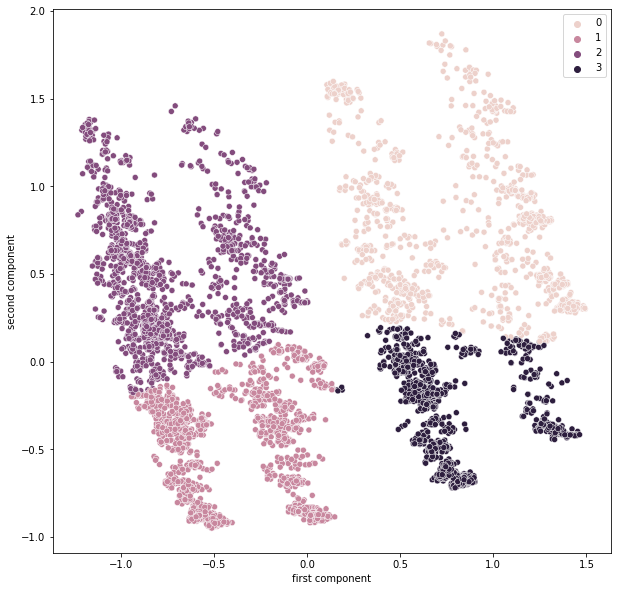

In [97]:
plt.figure(figsize=(10,10))

sns.scatterplot(
    x=two_pca[0],
    y=two_pca[1],
    hue=labels
)
plt.xlabel('first component')
plt.ylabel('second component')

In [93]:
silhouette_score(two_pca[[0,1]],two_pca.labels)

0.48515643224393207